In [1]:
%matplotlib notebook

In [2]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
from dateutil.relativedelta import relativedelta
import ipywidgets as widgets
from IPython.display import display

from mytools import *

In [3]:
from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

In [4]:
# load nasdaq cph company names and stock symbols
stocks_df = pd.read_csv("selected_cph_stocks.csv")

In [5]:
now = dt.datetime.now()
start = now - relativedelta(years=2)

In [6]:
data = pdr.get_data_yahoo(stocks_df["Symbol"], start, now)
# data[('Close', 'MAERSK-B.CO')]

In [7]:
indicators = {
    "rsi":[],
    "rsi_trend":[],
    "ma1":[],
    "ma1_trend":[],
    "ma2":[],
    "ma2_trend":[]
}

for i, stock_df in stocks_df.iterrows():
    ticker = stock_df["Symbol"]
    
    # price
    price = data[('Close', ticker)].to_numpy()

    # compute relative strenght
    rsi1 = rsi(price, 14)
    rsi1_ma = sma(rsi1, 3)
    rsi1_trend = (rsi1_ma[-1] - rsi1_ma[-2]) / 1.0

    # compute short moving average
    ma1 = sma(price, 14)
    ma1_trend = (ma1[-1] - ma1[-2]) / 1.0

    # compute long moving average
    ma2 = sma(price, 28)
    ma2_trend = (ma2[-1] - ma2[-2]) / 1.0

    # insert in dict
    indicators["rsi"].append(rsi1[-1])
    indicators["rsi_trend"].append(rsi1_trend)
    indicators["ma1"].append(ma1[-1])
    indicators["ma1_trend"].append(ma1_trend)
    indicators["ma2"].append(ma2[-1])
    indicators["ma2_trend"].append(ma2_trend)  

In [8]:
analysis_df = stocks_df.join(pd.DataFrame(indicators))

In [9]:
analysis_df

Name        Symbol Currency             Sector  \
0        A.P. Møller - Mærsk B   MAERSK-B.CO      DKK        Industrials   
1                 ALK-Abelló B      ALK-B.CO      DKK        Health Care   
2                   Alm. Brand       ALMB.CO      DKK         Financials   
3                         Ambu     AMBU-B.CO      DKK        Health Care   
4               Bang & Olufsen         BO.CO      DKK  Consumer Services   
5              Bavarian Nordic       BAVA.CO      DKK        Health Care   
6                     BioPorto     BIOPOR.CO      DKK        Health Care   
7                        Boozt  BOOZT-DKK.CO      DKK  Consumer Services   
8                  Carlsberg B     CARL-B.CO      DKK     Consumer Goods   
9                       CBRAIN     CBRAIN.CO      DKK         Technology   
10                       Cemat      CEMAT.CO      DKK         Technology   
11                  ChemoMetec      CHEMM.CO      DKK        Health Care   
12                 Coloplast B     COLO-B.CO      DKK        Health Care   
13                    Columbus      COLUM.CO      DKK         Technology   
14                  D/S Norden      DNORD.CO      DKK        Industrials   
15                      Demant     DEMANT.CO      DKK        Health Care   
16                        DFDS       DFDS.CO      DKK        Industrials   
17                         DSV        DSV.CO      DKK        Industrials   
18                  FirstFarms     FFARMS.CO      DKK     Consumer Goods   
19              FLSmidth & Co.        FLS.CO      DKK        Industrials   
20             Flügger group B     FLUG-B.CO      DKK        Industrials   
21                      Genmab       GMAB.CO      DKK        Health Care   
22               GN Store Nord         GN.CO      DKK        Health Care   
23      Green Hydrogen Systems     GREENH.CO      DKK             Energy   
24               GreenMobility     GREENM.CO      DKK        Industrials   
25               H. Lundbeck B     HLUN-B.CO      DKK        Health Care   
26               HusCompagniet      HUSCO.CO      DKK  Consumer Services   
27                         ISS        ISS.CO      DKK        Industrials   
28        Københavns Lufthavne       KBHL.CO      DKK        Industrials   
29                       Matas      MATAS.CO      DKK  Consumer Services   
30            Netcompany Group       NETC.CO      DKK         Technology   
31                         NKT        NKT.CO      DKK        Industrials   
32                        NNIT       NNIT.CO      DKK         Technology   
33           Noble Corporation      NOBLE.CO      DKK             Energy   
34              Novo Nordisk B     NOVO-B.CO      DKK        Health Care   
35                 Novozymes B     NZYM-B.CO      DKK        Health Care   
36  NTG Nordic Transport Group        NTG.CO      DKK        Industrials   
37                   Orphazyme      ORPHA.CO      DKK        Health Care   
38                     Pandora     PNDORA.CO      DKK  Consumer Services   
39                  Rockwool B     ROCK-B.CO      DKK        Industrials   
40               Royal UNIBREW      RBREW.CO      DKK     Consumer Goods   
41                    Sanistål       SANI.CO      DKK  Consumer Services   
42                     Solar B    SOLAR-B.CO      DKK        Industrials   
43                  Topdanmark        TOP.CO      DKK         Financials   
44                      TORM A     TRMD-A.CO      DKK        Industrials   
45                        Tryg       TRYG.CO      DKK         Financials   
46         Vestas Wind Systems        VWS.CO      DKK             Energy   
47              Zealand Pharma       ZEAL.CO      DKK        Health Care   
48                       Össur       OSSR.CO      DKK        Health Care   
49                      Ørsted     ORSTED.CO      DKK          Utilities   

          rsi  rsi_trend           ma1  ma1_trend           ma2  ma2_trend  
0   51.091390  -0.603733  15417.142857 -30.714286  15181.785714  20.5357

<IPython.core.display.Javascript object>


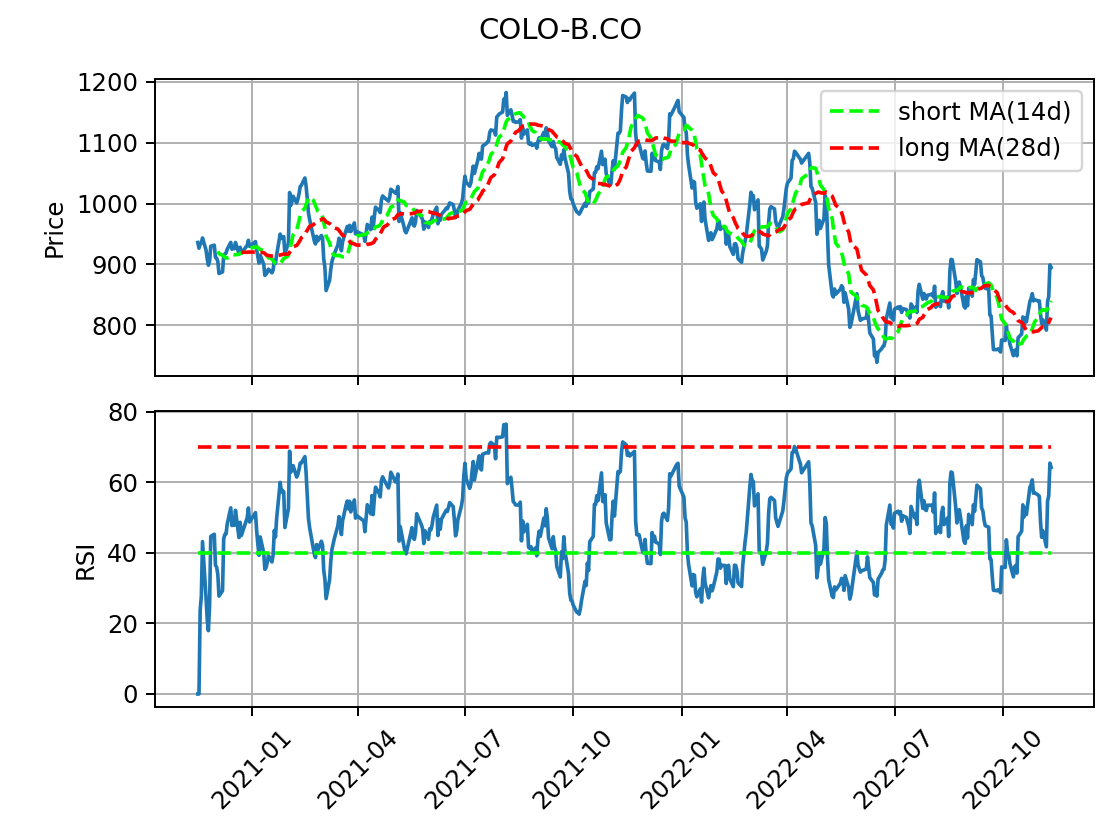

Dropdown(description='Symbol:', options=('MAERSK-B.CO', 'ALK-B.CO', 'ALMB.CO', 'AMBU-B.CO', 'BO.CO', 'BAVA.CO'…

In [14]:
choose_symbol = widgets.Dropdown(
    options=stocks_df["Symbol"],
    value=stocks_df["Symbol"][0],
    description='Symbol:',
)

signal = data[("Close", choose_symbol.value)]
index = data.index
shortMa = pd.Series(sma(signal.to_numpy(),14), index=index)
longMa = pd.Series(sma(signal.to_numpy(),28), index=index)
signal_rsi = pd.Series(rsi(signal.to_numpy(), 14), index=index)

fig = plt.figure()
fig.clf()
fig.suptitle(choose_symbol.value)

ax11 = fig.add_subplot(211)
lSignal, = ax11.plot(signal)
lShortMA, = ax11.plot(shortMa, '--', color='lime', label="short MA(14d)")
lLongMA, = ax11.plot(longMa, '--', color='red', label="long MA(28d)")
ax11.set_ylabel('Price')
ax11.grid(True)
ax11.tick_params(axis='x', labelbottom=False)

handles, labels = ax11.get_legend_handles_labels()
ax11.legend(handles, labels)

ax12 = fig.add_subplot(212, sharex=ax11)
lRsi, = ax12.plot(signal_rsi)
ax12.plot(pd.Series(40, index=index), '--', color='lime')
ax12.plot(pd.Series(70, index=index), '--', color='red')
ax12.set_ylabel('RSI')
ax12.grid(True)
ax12.tick_params(axis='x', labelrotation=45)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
                
        signal = data[("Close", choose_symbol.value)]
        shortMa = pd.Series(sma(signal.to_numpy(),14), index=index)
        longMa = pd.Series(sma(signal.to_numpy(),28), index=index)
        signal_rsi = pd.Series(rsi(signal.to_numpy(), 14), index=index)
        
        fig.suptitle(choose_symbol.value)
        lSignal.set_data(signal.index, signal.values)
        lShortMA.set_data(shortMa.index, shortMa.values)
        lLongMA.set_data(longMa.index, longMa.values)
        lRsi.set_data(signal_rsi.index, signal_rsi.values)

        # recompute the ax.dataLim
        ax11.relim()
        ax12.relim()
        # update ax.viewLim using the new dataLim
        ax11.autoscale_view()
        ax12.autoscale_view()
        
        fig.canvas.draw()
        
choose_symbol.observe(on_change)

display(choose_symbol)

plt.tight_layout()
plt.show()